In [14]:
from datacov import GenMAPL, TopoGen, RevHata, RevMa, VoroGeom, CircleGeom

In [2]:
band_params = {
    'bands': [800, 2600],
    'band_probs': [1., 0.6],
    'ue_dist_scale': [300, 150],
    'ue_dist_loc': [500, 200]
}
topo = TopoGen(**band_params, minlim=1000, maxlim=3500, n_sites=6)
_, _ = topo.generate_topo()

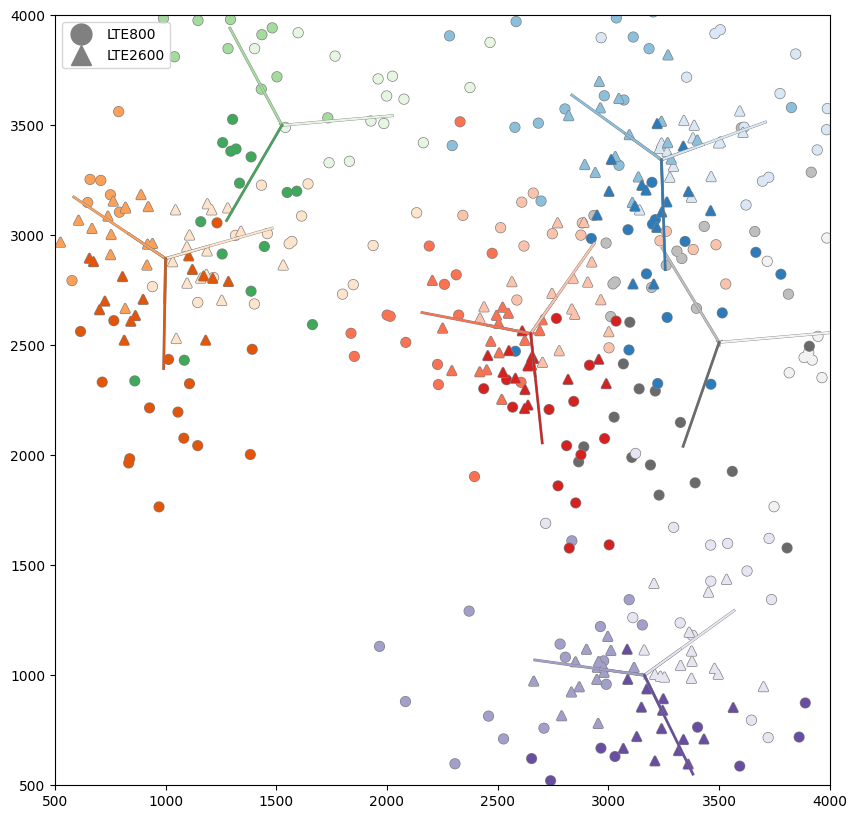

In [3]:
topo.plot_topography()

In [4]:
topo_config = topo.cells.drop('geometry', axis=1).merge(topo.sites.drop('geometry', axis=1), on=['bs_id', 'x', 'y'])

In [5]:
mapl = GenMAPL(topo_config, n_prb=1)
hata = RevHata(mapl)
ma = RevMa(mapl)

In [27]:
mapl.data.head()

,cell_id,bs_id,az_id,frequency,azimut,x,y,h_bs,context,sd_sf,g_ue,m_building,mapl
0,bs0_az0_800,bs0,az0,800,18.0,2921.377194,1000.0,12,suburban,7.0,16.0,15.0,128.910529
1,bs0_az1_800,bs0,az1,800,120.0,2921.377194,1000.0,12,urban,8.0,16.0,18.0,124.265675
2,bs0_az2_800,bs0,az2,800,232.0,2921.377194,1000.0,12,suburban,7.0,16.0,15.0,128.910529
3,bs0_az0_2600,bs0,az0,2600,18.0,2921.377194,1000.0,12,urban,8.0,19.0,18.0,127.265675
4,bs0_az1_2600,bs0,az1,2600,120.0,2921.377194,1000.0,12,suburban,7.0,19.0,15.0,131.910529


In [15]:
v = VoroGeom.from_topo(topo)
c = CircleGeom.from_topo(topo)

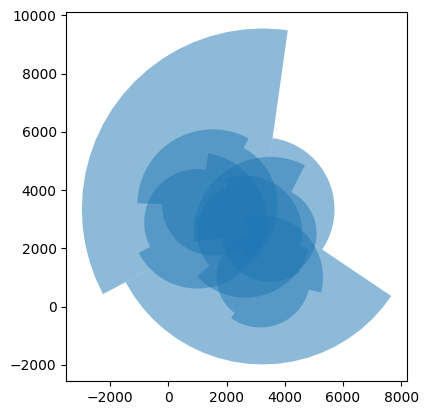

In [27]:
c_ma.plot(800, alpha=0.5)

<Axes: >

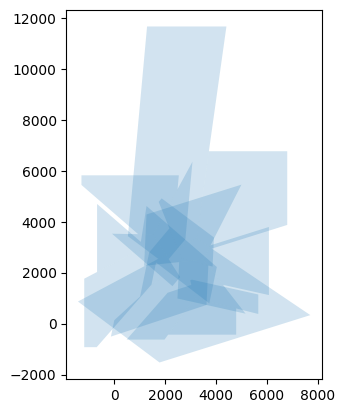

In [10]:
v_ma.cell_shapes[v_ma.cell_shapes.band == 800].plot(alpha=0.2)